<a href="https://colab.research.google.com/github/Hamdankim/2341720251_ML_2025/blob/main/JS09/P2_JS09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum 2 - Naive Bayes

## Langkah 1 - Buat Dataset Dummy

In [1]:
import numpy as np
from sklearn.datasets import make_classification

X,y = make_classification(n_samples=30, n_features=2, n_classes=2,
                          n_informative=2, n_redundant=0, n_repeated=0,
                          shuffle=False)

X = np.absolute(X)
X = np.round(X, 2) * 100
X = X.astype(int)

print(X)
print(y)

[[176  95]
 [129  69]
 [128 143]
 [200 108]
 [191 100]
 [161 160]
 [104  83]
 [  7  78]
 [128  55]
 [ 84 106]
 [ 95 124]
 [152  23]
 [130  85]
 [ 90 112]
 [ 95  84]
 [ 96 106]
 [121 106]
 [111  97]
 [108 109]
 [ 99 112]
 [120  89]
 [117 119]
 [108  78]
 [ 96 107]
 [ 93  81]
 [122 175]
 [ 81  64]
 [ 95 102]
 [107 118]
 [ 77  24]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


## Langkah 2 - Membuat DataFrame

In [2]:
import pandas as pd

y_new = y.reshape(len(y), 1)
data = np.concatenate((X, y_new), axis=1)
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

df = pd.DataFrame(data, columns=nama_kolom)
df.head()

,Fitur 1,Fitur 2,Label
0,176,95,0
1,129,69,0
2,128,143,0
3,200,108,0
4,191,100,0


## Langkah 3 - Labeling

In [3]:
labels = {1: 'Kelas A', 0: 'Kelas B'}
df_label = df.copy()
df_label['Label'] = df_label['Label'].map(labels)
df_label.head()

,Fitur 1,Fitur 2,Label
0,176,95,Kelas B
1,129,69,Kelas B
2,128,143,Kelas B
3,200,108,Kelas B
4,191,100,Kelas B


## Langkah 4 - Visualisasi Data

/tmp/ipython-input-361283597.py:6: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  class_a = gb.get_group('Kelas A')
/tmp/ipython-input-361283597.py:7: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  class_b = gb.get_group('Kelas B')


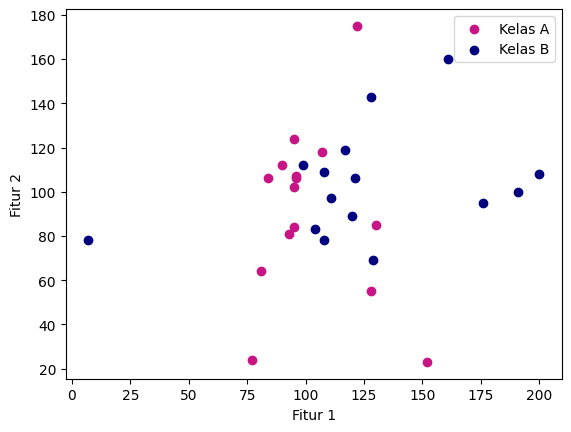

In [4]:
import matplotlib.pyplot as plt

colors = {'class_a': 'MediumVioletRed', 'class_b': 'Navy'}

gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.show()

## Langkah 5 - Multinomial Naive Bayes

In [5]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

mnb = MultinomialNB()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

mnb.fit(X_train, y_train)
y_train_pred = mnb.predict(X_train)
y_test_pred = mnb.predict(X_test)

acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.5714285714285714
Hasil akurasi data test: 0.2222222222222222


## Langkah 6 - Gaussian Naive Bayes

In [6]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_train_pred_gnb = gnb.predict(X_train)
y_test_pred_gnb = gnb.predict(X_test)

acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.6666666666666666
Hasil akurasi data test (Gaussian): 0.4444444444444444
